In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} descartes

In [2]:
import pandas as pd
import os 
import h3 as h3
import matplotlib.pyplot as plt
import plotly
import folium
import webbrowser
from shapely import wkt

from folium import Map
import geopandas as gpd
from splot.mapping import vba_choropleth

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# source: https://geoportal.statistics.gov.uk/datasets/lower-layer-super-output-areas-december-2011-boundaries-ew-bgc/geoservice

# df = gpd.read_file("https://opendata.arcgis.com/datasets/155d7311193245d39cd4ac27383881f3_0.geojson")
# df.head()

In [5]:
# geojosn_as_csv = df.to_csv('~/downloads/geojson_as_csv.csv')

In [6]:
# geojson_as_csv = pd.read_csv('~/downloads/geojson_as_csv.csv')
# geojson_as_csv.head()

In [7]:
depr_eng = pd.read_csv('~/downloads/lsoa_depr_visits_combo.csv')
depr_eng.head()


,LSOA11CD,n_of_visits,IMD_Score
0,E01000002,5,5.143
1,E01000003,5,19.402
2,E01000005,4,28.652
3,E01000006,101,19.837
4,E01000007,101,31.576


In [8]:
# lsoa_gjson_dep_combfile = pd.merge(depr_eng, geojson_as_csv, how='inner', on=['LSOA11CD'])

# lsoa_gjson_dep_combfile.head()

In [9]:
# lsoa_gjson_dep_combfile.dropna(axis=1, how='all', inplace=True)  # drops all nan columns
# lsoa_gjson_dep_combfile.head()
# gdfa = lsoa_gjson_dep_combfile.to_csv('~/downloads/csv_each_lsoa_dep_visits.csv')
# geojosn_as_csv = df.to_csv('~/downloads/geojson_as_csv.csv')

In [10]:
# lsoa_gjson_dep_combfile.shape

In [11]:
gdf = pd.read_csv("~/downloads/csv_each_lsoa_dep_visits.csv")
gdf.head()

,LSOA11CD,n_of_visits,IMD_Score,LSOA11NM,LSOA11NMW,Shape__Area,Shape__Length,geometry
0,E01000002,5,5.143,City of London 001B,City of London 001B,226191.27300,2433.960112,"POLYGON ((-0.088102993667893 51.5194124058449,..."
1,E01000003,5,19.402,City of London 001C,City of London 001C,57302.96655,1142.359799,POLYGON ((-0.09675965842852099 51.523251318566...
2,E01000005,4,28.652,City of London 001E,City of London 001E,190738.76050,2167.868343,POLYGON ((-0.07320468447793101 51.510003758565...
3,E01000006,101,19.837,Barking and Dagenham 016A,Barking and Dagenham 016A,144195.84690,1935.510354,"POLYGON ((0.091179165495574 51.5390863719651, ..."
4,E01000007,101,31.576,Barking and Dagenham 015A,Barking and Dagenham 015A,198134.80920,2824.036914,POLYGON ((0.07776794849329099 51.5427927362866...


In [12]:
gdf['geometry'] = gdf['geometry'].apply(wkt.loads)

gdf1 = gpd.GeoDataFrame(gdf, crs='epsg:4326')


In [13]:
# fig, ax = plt.subplots(figsize=(12,10))
# vba_choropleth(
#      gdf1['n_of_visits'].values, 
#      gdf1['IMD_Score'].values, 
#      gdf1, 
#      rgb_mapclassify=dict(classifier='quantiles'),
#      alpha_mapclassify=dict(classifier='quantiles'),
#      cmap='RdBu', 
#      ax=ax,
#      revert_alpha=False ),

# plt.show()

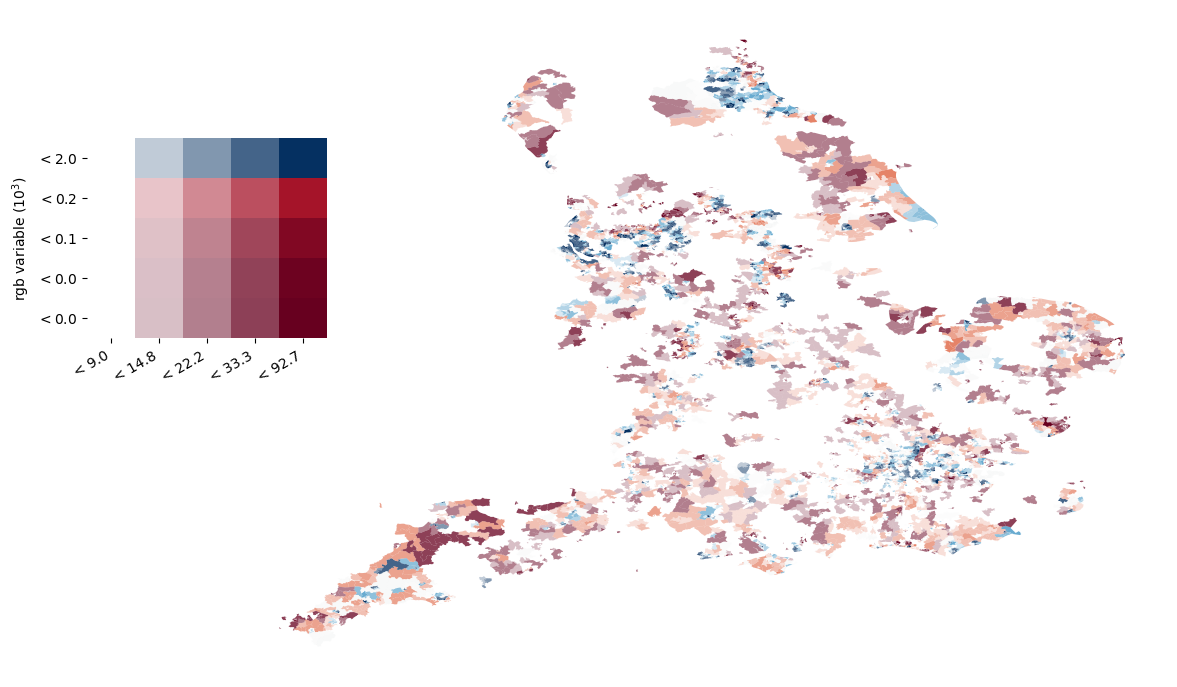

In [14]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(12,10))
vba_choropleth(
     gdf1['n_of_visits'].values, 
     gdf1['IMD_Score'].values, 
     gdf1, 
     rgb_mapclassify=dict(classifier='quantiles'),
     alpha_mapclassify=dict(classifier='quantiles'),
     cmap='RdBu', 
     ax=ax,
     revert_alpha=False,
#      revert_alpha=True,      # if True, it will revert the transparency of the y values
     legend = True 
)
plt.show()